In [8]:
import pandas as pd
import numpy as np 
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from ast import literal_eval

In [9]:
tweets = pd.read_csv("finished_hate_speech.csv", converters={"noStop": literal_eval})

tweets = tweets[tweets['hate'].isin(['0', '1'])]

labels = tweets['hate'].astype(int)

tweets['joined_tokens'] = tweets['noStop'].apply(lambda toks: " ".join(toks) if isinstance(toks, list) else "")

vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,1))
X = vectorizer.fit_transform(tweets['joined_tokens'])
feature_names = vectorizer.get_feature_names_out()

/var/folders/1h/g667g7nd38v0hqcmf04mf2hc0000gn/T/ipykernel_12531/360731548.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv("finished_hate_speech.csv", converters={"noStop": literal_eval})


In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)


In [30]:
rf_start = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)
ada_model = AdaBoostClassifier(estimator=rf_start, n_estimators=5, learning_rate=1, random_state=42)

print("Model training has began")
rf_model = ada_model.fit(X_train, y_train)
print("Training is complete")

binary_predictions = rf_model.predict(X_test)
cm = metrics.confusion_matrix(y_test, binary_predictions)

print("Random Forest Scores:")
print("Accuracy: ", metrics.accuracy_score(y_test, binary_predictions))
print("Precision:", metrics.precision_score(y_test, binary_predictions, zero_division=0))
print("Recall:   ", metrics.recall_score(y_test, binary_predictions, zero_division=0))
print("F1 score: ", metrics.f1_score(y_test, binary_predictions, zero_division=0))


Model training has began
Training is complete
Random Forest Scores:
Accuracy:  0.878068428472331
Precision: 0.8329938900203666
Recall:    0.13403244306078976
F1 score:  0.2309103740296401


In [ ]:
tree_number = [5, 10, 15]
tree_depth = [5, 10, 15]
ada_iterations = [5, 10, 20]

results = []

for n_ada in ada_iterations:
    for trees in tree_number:
        for depth in tree_depth:

            rf_start = RandomForestClassifier(n_estimators=trees, max_depth=depth, n_jobs=-1, random_state=42)
            ada_model = AdaBoostClassifier(estimator=rf_start, n_estimators=n_ada, learning_rate=1, random_state=42)

            rf_model = ada_model.fit(X_train, y_train)
            binary_predictions = rf_model.predict(X_test)

            rec = metrics.recall_score(y_test, binary_predictions)
            f1 = metrics.f1_score(y_test, binary_predictions)

            current_results = {
                "Ada_Iterations" : n_ada,
                "Num_Trees" : trees,
                "Max_Depth": depth,
                "Recall": rec,
                "F1": f1
            }

            results.append(current_results)
            



In [44]:
df_results = pd.DataFrame(results)
best_models = df_results.sort_values(by="F1", ascending=False)

best_models

,Ada_Iterations,Num_Trees,Max_Depth,Reacll,F1
20,20,5,15,0.448796,0.556707
23,20,10,15,0.435524,0.554039
26,20,15,15,0.425692,0.546200
25,20,15,10,0.425037,0.541828
22,20,10,10,0.404719,0.527102
19,20,5,10,0.396035,0.514693
24,20,15,5,0.386367,0.503954
14,10,10,15,0.375881,0.499456
16,10,15,10,0.351466,0.480618
21,20,10,5,0.348681,0.472836


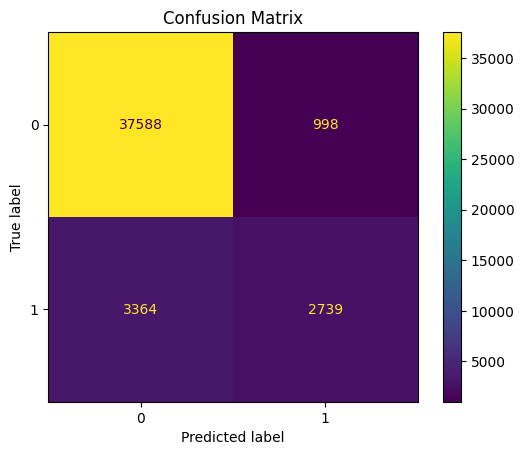

In [46]:
rf_start = RandomForestClassifier(n_estimators=5, max_depth=15, n_jobs=-1, random_state=42)
ada_model = AdaBoostClassifier(estimator=rf_start, n_estimators=20, learning_rate=1, random_state=42)

rf_model = ada_model.fit(X_train, y_train)
binary_predictions = rf_model.predict(X_test)

cm = metrics.confusion_matrix(y_test, binary_predictions)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
display.plot()
plt.title("Confusion Matrix")
plt.show()
